In [17]:
%run ./bayesian-optimization/python/gp.py
%run ./bayesian-optimization/python/plotters.py
from simulation import polymer
from hill_climbing import hill_climbing
from data_processing import minMaxNorm, medianFoldNorm, Comparison
import matplotlib.pyplot as plt
import numpy as np
from sklearn import gaussian_process

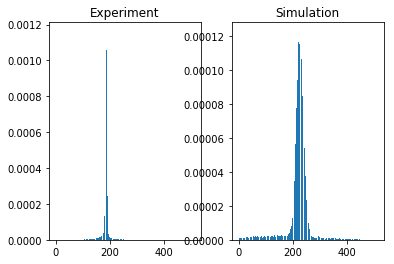

In [2]:
diff = medianFoldNorm('Data/polymer_20k.xlsx', polymer)
X = np.array([1.06200000e+03, 4.68740000e+04, 6.45597730e+07, 2.33000850e-01,
 8.31542953e-05, 5.03979215e-01, 5.94244875e-01, 5.18169312e-01
, 8.16113628e-01, 1.00000000e+00])[None,:]
y = np.array([diff.get_difference(X[0], plot=True)])

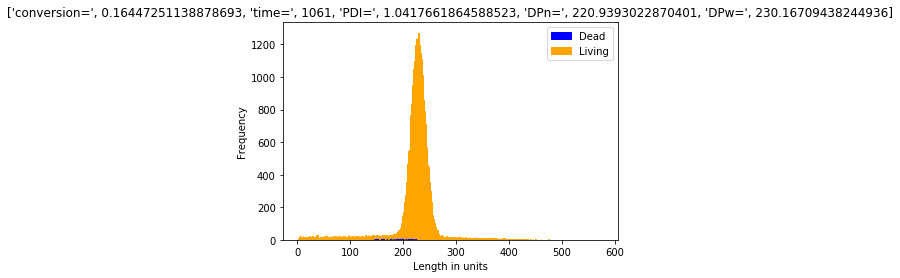

[array([231., 218., 207., ..., 219., 235., 222.]),
 array([ 33.,  34.,  37., ..., 222., 238., 241.]),
 array([], dtype=float64)]

In [3]:
diff.sim(*X[0],final_plot=True)

In [ ]:
kernel = gaussian_process.kernels.RBF(length_scale=2.0, length_scale_bounds=(1, 10.0))
model = gaussian_process.GaussianProcessRegressor(kernel=kernel, copy_X_train=True)
model.get_params()
model.fit(X,y)
model.predict(X)

X = np.vstack((X,[1000, 100000, 31600000, 0.2,
    0.0000806, 0.5, 0.67, 0.67, 1, 1]))
y = np.vstack((y,diff.get_difference(X[1])))

model.fit(X,y)

In [ ]:
X_test = np.array([[9.22312785e+02, 9.90900128e+04, 5.00606276e+06, 2.89285078e-01,
         6.62946796e-01, 4.92841366e-01, 9.90897467e-01, 4.65048165e-01,
         4.94391675e-01, 1.00000000e+00]])
print(model.sample_y(X_test,10))

diff.get_difference(X_test[0])

In [18]:
%matplotlib
diff = medianFoldNorm('Data/polymer_20k.xlsx', polymer)
bound = np.array([[900,1100],[90000,110000],[3000000,32000000],
                   [0,1],[0,0.0001],[0,1],[0,1],[0,1],[0,1],[1,1]])
X0 = np.array([[1000, 100000, 31600000, 0.2,
    0.0000806, 0.5, 0.67, 0.67, 1, 1]])
xp,yp = bayesian_optimisation(15,diff.get_difference, bound,
                        None,1,alpha=0.1,epsilon=1e-5)


Using matplotlib backend: TkAgg


In [10]:
xp,yp

(array([[9.83612756e+02, 9.55375286e+04, 9.24490727e+06, 3.44061476e-01,
         3.32274629e-05, 2.73695160e-01, 5.89999830e-01, 5.35113746e-01,
         9.03431542e-01, 1.00000000e+00],
        [1.06704275e+03, 9.08065476e+04, 7.97233944e+06, 6.89578190e-02,
         7.93547246e-05, 3.37943674e-01, 8.32092442e-01, 7.37029671e-01,
         3.51530006e-02, 1.00000000e+00],
        [1.05397317e+03, 1.06928498e+05, 2.31644182e+07, 9.26458675e-01,
         2.57463563e-05, 8.35539183e-01, 1.73789447e-01, 2.53204909e-01,
         3.00257182e-01, 1.00000000e+00],
        [1.04467257e+03, 9.57831933e+04, 6.61882911e+06, 8.66185437e-02,
         6.08917931e-05, 9.00188154e-02, 5.09461644e-01, 6.14640374e-01,
         5.14715232e-01, 1.00000000e+00],
        [1.08957414e+03, 1.03809805e+05, 2.87407724e+07, 3.72508382e-01,
         9.84638264e-05, 4.43793665e-01, 2.33474039e-01, 6.01328203e-01,
         9.88617742e-01, 1.00000000e+00],
        [1.08585351e+03, 1.03900272e+05, 2.94837625e+07, 7.2

In [20]:
diff = medianFoldNorm('Data/polymer_20k.xlsx', polymer)
diff.get_difference(xp[yp.argmin()],plot=True)

diff.sim(*xp[yp.argmin()],final_plot=True)


[array([62., 52., 61., ..., 54., 47., 43.]),
 array([66., 46., 51., 62., 65., 52., 51., 50., 56., 48., 62., 46., 44.,
        56., 72., 53., 59., 67.]),
 array([], dtype=float64)]